In [24]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import f1_score, precision_score, recall_score

In [25]:
# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)

proporcao_amostra = 0.15

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Dividir o conjunto de treinamento novamente para obter uma amostra
X_train_amostra, _, y_train_amostra, _ = train_test_split(X_train, y_train, train_size=proporcao_amostra, random_state=42)

In [26]:
X_train_amostra.shape

(8400, 784)

### SVC

In [27]:
# Definir os parâmetros a serem testados
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
}

# Testar diferentes kernels
kernels = ['linear', 'poly', 'rbf']

In [28]:
for kernel in kernels:
    print(f"Kernel: {kernel}")
    
    # Criar o classificador SVC
    svc = SVC(kernel=kernel)
    
    # Realizar a busca em grade para encontrar os melhores parâmetros
    grid_search = GridSearchCV(svc, param_grid, cv=3, n_jobs=-1)
    grid_search.fit(X_train_amostra, y_train_amostra)
    
    # Avaliar o modelo com os melhores parâmetros
    best_svc = grid_search.best_estimator_
    y_pred = best_svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calcular as métricas F1-score, precisão e recall
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Acurácia com os melhores parâmetros: {accuracy}")
    print(f"F1-score com os melhores parâmetros: {f1}")
    print(f"Precisão com os melhores parâmetros: {precision}")
    print(f"Recall com os melhores parâmetros: {recall}")
    print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")

Kernel: linear
Acurácia com os melhores parâmetros: 0.9100714285714285
F1-score com os melhores parâmetros: 0.9095613865013162
Precisão com os melhores parâmetros: 0.9101621423532044
Recall com os melhores parâmetros: 0.9100714285714285
Melhores parâmetros encontrados: {'C': 0.1, 'gamma': 0.001}
Kernel: poly
Acurácia com os melhores parâmetros: 0.9534285714285714
F1-score com os melhores parâmetros: 0.9533653511679805
Precisão com os melhores parâmetros: 0.9535425127649713
Recall com os melhores parâmetros: 0.9534285714285714
Melhores parâmetros encontrados: {'C': 0.1, 'gamma': 0.01}
Kernel: rbf
Acurácia com os melhores parâmetros: 0.11428571428571428
F1-score com os melhores parâmetros: 0.02344322344322344
Precisão com os melhores parâmetros: 0.013061224489795919
Recall com os melhores parâmetros: 0.11428571428571428
Melhores parâmetros encontrados: {'C': 0.1, 'gamma': 0.001}


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### KNN

In [29]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# Fazer previsões no conjunto de teste
y_pred_knn = knn.predict(X_test)

In [31]:
# Calcular a acurácia do modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Acurácia do modelo KNN:", accuracy_knn)

Acurácia do modelo KNN: 0.9700714285714286


In [32]:
# Calcular outras métricas para o modelo KNN
report_knn = classification_report(y_test, y_pred_knn)
print("Métricas do modelo KNN:")
print(report_knn)

Métricas do modelo KNN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### KMEANS

In [33]:
# Treinar o modelo KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=42)

In [34]:
# Fazer previsões no conjunto de teste
y_pred_kmeans = kmeans.predict(X_test)

In [35]:
# Calcular o coeficiente de silhueta do modelo KMeans
silhouette_score_kmeans = silhouette_score(X_test, y_pred_kmeans)
print("Coeficiente de silhueta do modelo KMeans:", silhouette_score_kmeans)

Coeficiente de silhueta do modelo KMeans: 0.055615057400998355


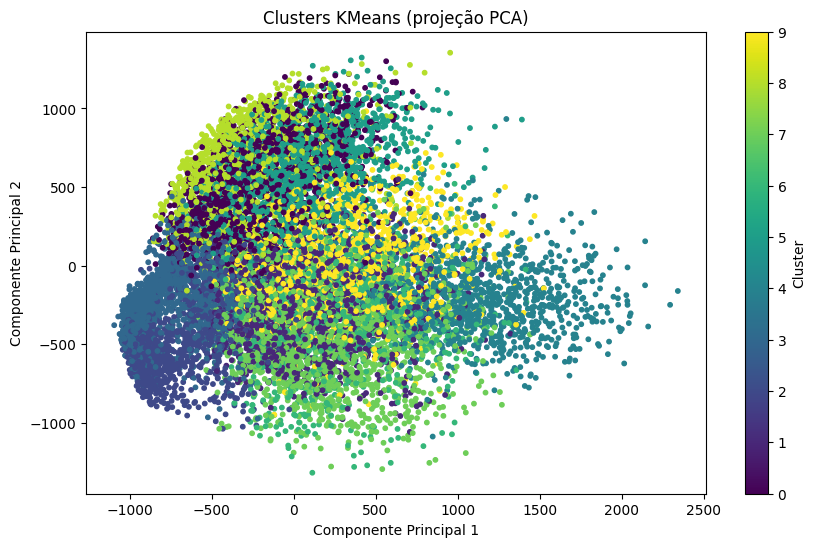

In [36]:
# Reduzir a dimensionalidade dos dados usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmeans, cmap='viridis', s=10)
plt.title('Clusters KMeans (projeção PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [37]:
# Calcular outras métricas para o modelo KMeans
inercia = kmeans.inertia_
homogeneidade = homogeneity_score(y_test, y_pred_kmeans)
completude = completeness_score(y_test, y_pred_kmeans)
v_measure = v_measure_score(y_test, y_pred_kmeans)

print("Inércia:", inercia)
print("Homogeneidade:", homogeneidade)
print("Completude:", completude)
print("V-measure:", v_measure)

Inércia: 143127516002.95636
Homogeneidade: 0.5215753844165045
Completude: 0.5245615149281087
V-measure: 0.5230641878135394


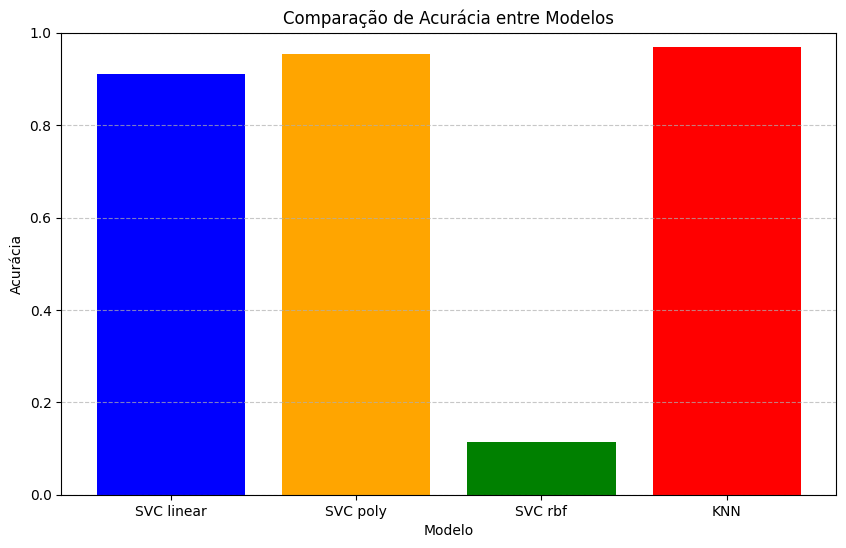

In [38]:
import matplotlib.pyplot as plt

# Dados dos modelos
modelos = ['SVC linear', 'SVC poly', 'SVC rbf', 'KNN']
acuracias = [0.9101, 0.9534, 0.1143, 0.97]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, acuracias, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')
plt.ylim(0, 1)  # Define o intervalo do eixo y de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

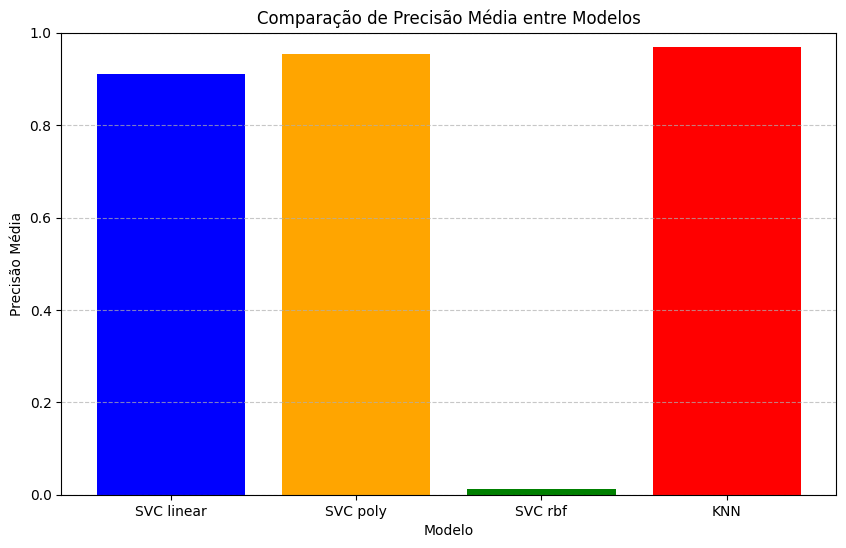

In [39]:
import matplotlib.pyplot as plt

# Dados dos modelos
modelos = ['SVC linear', 'SVC poly', 'SVC rbf', 'KNN']
precisoes = [0.9102, 0.9535, 0.0131, 0.97]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, precisoes, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Precisão Média')
plt.title('Comparação de Precisão Média entre Modelos')
plt.ylim(0, 1)  # Define o intervalo do eixo y de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

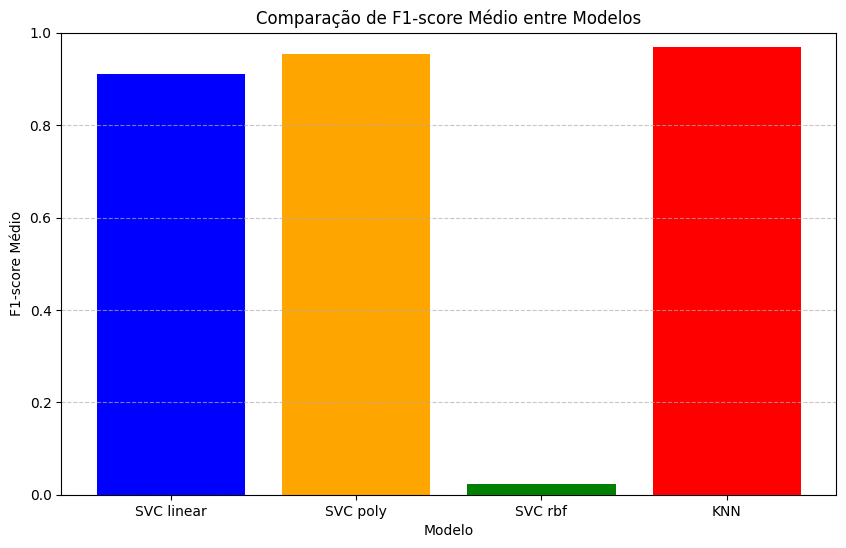

In [40]:
import matplotlib.pyplot as plt

# Dados dos modelos
modelos = ['SVC linear', 'SVC poly', 'SVC rbf', 'KNN']
f1_scores = [0.9096, 0.9534, 0.0234, 0.97]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, f1_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('F1-score Médio')
plt.title('Comparação de F1-score Médio entre Modelos')
plt.ylim(0, 1)  # Define o intervalo do eixo y de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


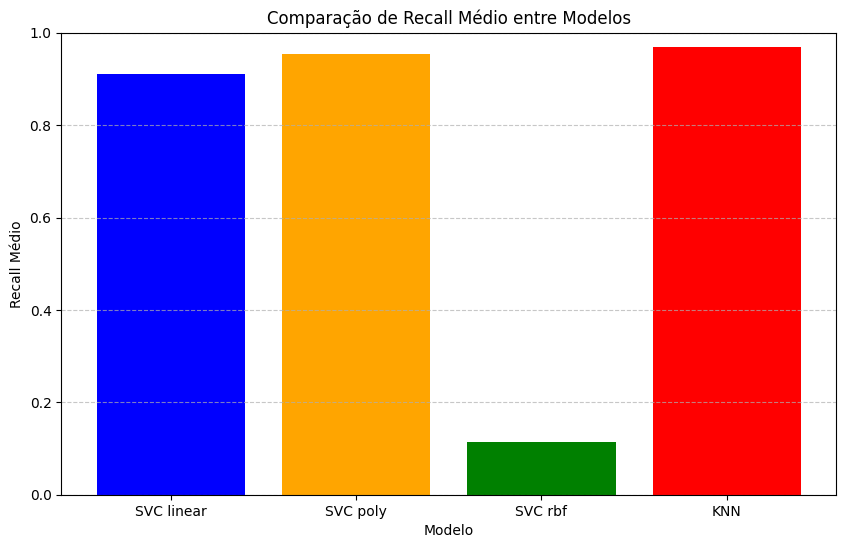

In [41]:
import matplotlib.pyplot as plt

# Dados dos modelos
modelos = ['SVC linear', 'SVC poly', 'SVC rbf', 'KNN']
recalls = [0.9101, 0.9534, 0.1143, 0.97]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, recalls, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Recall Médio')
plt.title('Comparação de Recall Médio entre Modelos')
plt.ylim(0, 1)  # Define o intervalo do eixo y de 0 a 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
